Exercise 6.1

a)

Junction $V_1$:
$$4V_1 -V_2-V_3-V_4=V_+.$$
Junction $V_2$:
$$V_2 - V_1 + V_2-V_4 + V_2=0,$$
$$3V_2 - V_1 - V_4 = 0.$$
Junction $V_3$:
$$V_3 - V_+ +V_3-V_1 + V_3-V_4=0,$$
$$3V_3 -V_1-V_4=V_+.$$
Junction $V_4$:
$$V_4-V_3 + V_4-V_1 + V_4-V_2 + V_4=0,$$
$$4V_4 - V_1 - V_2 - V_3=0.$$

In [8]:
import numpy as np
#b)
A = np.array([[4, -1, -1, -1],
              [-1, 3, -1, 0],
              [-1, 0, 3, -4],
              [-1, -1, -1, 4]
], float)

v = np.array([5, 0, 5, 0], float)
N = len(v)

#Gaussian elimination
for m in range(N):
    div = A[m,m]
    A[m, :] /= div
    v[m] /= div
    print(A)
    for i in range(m+1, N):
        mult = A[i, m]
        A[i, :] -= mult*A[m, :]
        v[i] -= mult*v[m]
        
#Backsubstitution
x = np.empty(N, float)
for m in range(N-1, -1, -1):
    x[m] = v[m]
    for i in range(m+1, N):
        x[m] -= A[m, i]*x[i] 
    
print(x)

[[ 1.   -0.25 -0.25 -0.25]
 [-1.    3.   -1.    0.  ]
 [-1.    0.    3.   -4.  ]
 [-1.   -1.   -1.    4.  ]]
[[ 1.         -0.25       -0.25       -0.25      ]
 [ 0.          1.         -0.45454545 -0.09090909]
 [ 0.         -0.25        2.75       -4.25      ]
 [ 0.         -1.25       -1.25        3.75      ]]
[[ 1.         -0.25       -0.25       -0.25      ]
 [ 0.          1.         -0.45454545 -0.09090909]
 [ 0.          0.          1.         -1.62068966]
 [ 0.          0.         -1.81818182  3.63636364]]
[[ 1.         -0.25       -0.25       -0.25      ]
 [ 0.          1.         -0.45454545 -0.09090909]
 [ 0.          0.          1.         -1.62068966]
 [ 0.          0.          0.          1.        ]]
[10.  9. 17.  9.]


Exercise 6.2

In [29]:
import numpy as np
#b)
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]
], float)

v = np.array([-4, 3, 9, 7], float)
N = len(v)

#Gaussian elimination
for m in range(N):
    pivoting = [abs(A[i, m]) for i in range(m, N)]
    pivot = pivoting.index(max(pivoting)) + m
    A_pivot = A.copy()
    A[m, :] = A_pivot[pivot, :]
    A[pivot, :] = A_pivot[m, :]
    v_pivot = v.copy()
    v[m] = v_pivot[pivot]
    v[pivot] = v_pivot[m]
    div = A[m,m]
    A[m, :] /= div
    v[m] /= div
    
    
    for i in range(m+1, N):
        mult = A[i, m]
        A[i, :] -= mult*A[m, :]
        v[i] -= mult*v[m]
        
#Backsubstitution
x = np.empty(N, float)
for m in range(N-1, -1, -1):
    x[m] = v[m]
    for i in range(m+1, N):
        x[m] -= A[m, i]*x[i] 
    
print(x)

[ 2. -1. -2.  1.]


In [30]:
import numpy as np
#b)
A = np.array([[0, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]
], float)

v = np.array([-4, 3, 9, 7], float)
N = len(v)

#Gaussian elimination
for m in range(N):
    pivoting = [abs(A[i, m]) for i in range(m, N)]
    pivot = pivoting.index(max(pivoting)) + m
    A_pivot = A.copy()
    A[m, :] = A_pivot[pivot, :]
    A[pivot, :] = A_pivot[m, :]
    v_pivot = v.copy()
    v[m] = v_pivot[pivot]
    v[pivot] = v_pivot[m]
    div = A[m,m]
    A[m, :] /= div
    v[m] /= div
    for i in range(m+1, N):
        mult = A[i, m]
        A[i, :] -= mult*A[m, :]
        v[i] -= mult*v[m]
        
#Backsubstitution
x = np.empty(N, float)
for m in range(N-1, -1, -1):
    x[m] = v[m]
    for i in range(m+1, N):
        x[m] -= A[m, i]*x[i] 
    
print(x)

[ 1.61904762 -0.42857143 -1.23809524  1.38095238]


Exercise 6.3: LU decomposition

In [31]:
import numpy as np
#b)
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], float)

v = np.array([-4, 3, 9, 7], float)
N = len(v)
L = np.zeros_like(A)

#Gaussian elimination
for m in range(N):
    pivoting = [abs(A[i, m]) for i in range(m, N)]
    pivot = pivoting.index(max(pivoting)) + m
    A_pivot = A.copy()
    L_pivot = L.copy()
    A[m, :] = A_pivot[pivot, :]
    A[pivot, :] = A_pivot[m, :]
    v_pivot = v.copy()
    v[m] = v_pivot[pivot]
    v[pivot] = v_pivot[m]
    L[m, :] = L_pivot[pivot, :]
    L[pivot, :] = L_pivot[m, :]
    div = A[m,m]
    for i in range(m,N):
        L[i, m] = A[i, m]
    A[m, :] /= div
    #v[m] /= div
    for i in range(m+1, N):
        mult = A[i, m]
        A[i, :] -= mult*A[m, :]
        #v[i] -= mult*v[m]
        
A_ = np.zeros_like(A)
        
for i in range(N):
    for j in range(N):
        for k in range(N):
            A_[i,j] += L[i,k]*A[k,j]
print(L)
#print(A)
#print(A_)
        
#Backsubstitution

y = np.empty(N, float)
for m in range(N):
    y[m] = v[m]
    for i in range(m):
        y[m] -= L[m, i]*y[i]
    y[m] /= L[m,m]
        
#Backsubstitution
x = np.empty(N, float)
for m in range(N-1, -1, -1):
    x[m] = y[m]
    for i in range(m+1, N):
        x[m] -= A[m, i]*x[i] 
    
print("A=", A_)
print(x)

[[ 3.          0.          0.          0.        ]
 [ 1.         -5.33333333  0.          0.        ]
 [ 2.         -1.66666667  4.25        0.        ]
 [ 2.         -4.66666667  0.5        -1.        ]]
A= [[ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2.  1.  4.  1.]
 [ 2. -2.  1.  3.]]
[ 2. -1. -2.  1.]


In [32]:
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], float)

v = np.array([-4, 3, 9, 7], float)
np.linalg.solve(A, v)

array([ 2., -1., -2.,  1.])

In [47]:
import numpy as np

A = np.array([[0, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]
], float)

v = np.array([-4, 3, 9, 7], float)

print("solution using numpy:", np.linalg.solve(A, v))

N = len(v)
L = np.zeros_like(A)
pivot_rec = list(range(N))

#LU decomposition
for m in range(N):
    pivoting = [abs(A[i, m]) for i in range(m, N)]
    pivot = pivoting.index(max(pivoting)) + m
    pivot_rec[m], pivot_rec[pivot] = pivot_rec[pivot], pivot_rec[m]
    A_pivot = A.copy()
    L_pivot = L.copy()
    A[m, :] = A_pivot[pivot, :]
    A[pivot, :] = A_pivot[m, :]
    L[m, :] = L_pivot[pivot, :]
    L[pivot, :] = L_pivot[m, :]
    div = A[m,m]
    for i in range(m,N):
        L[i, m] = A[i, m]
    A[m, :] /= div
    for i in range(m+1, N):
        mult = A[i, m]
        A[i, :] -= mult*A[m, :]
        
        
A_ = np.zeros_like(A)
        
for i in range(N):
    for j in range(N):
        for k in range(N):
            A_[i,j] += L[i,k]*A[k,j]
        
#pivoting
v_copy = v.copy()
for i in range(N):
    v[i]= v_copy[pivot_rec[i]]

#Backsubstitution
y = np.empty(N, float)
for m in range(N):
    y[m] = v[m]
    for i in range(m):
        y[m] -= L[m, i]*y[i]
    y[m] /= L[m,m]
            
#Backsubstitution
x = np.empty(N, float)
for m in range(N-1, -1, -1):
    x[m] = y[m]
    for i in range(m+1, N):
        x[m] -= A[m, i]*x[i] 

print("solution using this program:",x)

solution using numpy: [ 1.61904762 -0.42857143 -1.23809524  1.38095238]
solution using this program: [ 1.61904762 -0.42857143 -1.23809524  1.38095238]


Exercise 6.4

In [48]:
import numpy as np
#b)
A = np.array([[4, -1, -1, -1],
              [-1, 3, -1, 0],
              [-1, 0, 3, -4],
              [-1, -1, -1, 4]
], float)

v = np.array([5, 0, 5, 0], float)

np.linalg.solve(A,v)

array([10.,  9., 17.,  9.])

Exercise 6.5

Point 1:
$$\frac{V_1-V_+}{R_1} + C_1\frac{d(V_1-V_2)}{dt}+\frac{V_1}{R_4}=0,$$
$$\frac{x_1e^{i\omega t} - x_+e^{i\omega t}}{R_1} + C_1 i\omega e^{i\omega t}(x_1-x_2)+x_1e^{i\omega t}\frac{1}{R_4}=0,$$
$$\frac{x_1-x_+}{R_1} + iC_1\omega (x_1-x_2)+\frac{x_1}{R_4}=0,$$
$$x_1 \left(\frac{1}{R_1} +\frac{1}{R_4}+ i\omega C_1  \right)-i\omega C_1 x_2 = \frac{x_+}{R_1}$$


Point 2:
$$C_1\frac{d(V_2-V_1)}{dt} + \frac{V_2-V_+}{R_2} + C_2\frac{d(V_2-V_3)}{dt} + \frac{V_2}{R_5}=0,$$
$$i\omega C_1 (x_2-x_1) + \frac{x_2-x_+}{R_2} + i\omega C_2 (x_2-x_3) + \frac{x_2}{R_5}=0,$$
$$-i\omega C_1 x_1 + \left(i\omega C_1 + \frac{1}{R_2} + i\omega C_2 +\frac{1}{R_5}\right )x_2 -i\omega C_2x_3=\frac{x_+}{R_2}.$$

Point 3:
$$C_2 \frac{d(V_3-V_2)}{dt} + \frac{V_3-V_+}{R_3} + \frac{V_3}{R_6}=0,$$
$$i\omega C_2 (x_3 - x_2) + \frac{x_3-x_+}{R_3} + \frac{x_3}{R_6}=0,$$
$$-i\omega C_2x_2 + \left(i\omega C_2 + \frac{1}{R_3} + \frac{1}{R_6} \right)x_3=\frac{x_+}{R_3}.$$

In [2]:
import numpy as np
from cmath import polar

A = np.array([
    [(1/1000) + (1/2000) + (1000j*1e-6), -1000j*1e-6, 0],
    [-1000j*1e-6, (1/2000)+(1/1000)+1000j*((1e-6) + 0.5e-6), -1000j*0.5e-6],
    [0, -1000j*0.5e-6, (1/1000) + (1/2000) + 1000j*0.5e-6]
])

v = np.array([3/1000, 3/2000, 3/1000])

for V in np.linalg.solve(A,v):
    print(polar(V))

(1.7014390658777336, -0.09545371433271416)
(1.4806053465364062, 0.20216879328855678)
(1.8607693200562134, -0.07268725004282395)


Exercise 6.7

Point 1:
$$V_1-V_+ + V_1-V_2 + V_1-V_3=0,$$
$$3V_1 - V_2 - V_3 =V_+.$$

Point 2:
$$V_2-V_+ V_2-V_1 + V_2-V_3+V_2-V_4=0,$$
$$-V_1 + 4V_2 - V_3 - V_4=V_+.$$

Point $i$:
$$V_i - V_{i-2} + V_i-V_{i-1} + V_i-V_{i+1} + V_i-V_{i+2}=0,$$
$$-V_{i-2}-V_{i-1}+4V_i-V_{i+1}-V_{i+2}=0.$$

Point $N-1$:
$$V_{N-1}-V_{N-3} + V_{N-1}-V_{N-2} + V_{N-1}-V_{N} + V_{N-1}=0,$$
$$-V_{N-3}-V_{N-2} + 4V_{N-1} - V_{N}=0.$$

Point $N$:
$$V_{N}-V_{N-2} + V_{N}-V_{N-1} + V_{N}=0,$$
$$-V_{N-2} - V_{N-1} + 3V_{N}=0.$$

In [17]:
import numpy as np

V_plus = 5
N = 6

A = np.zeros((N,N))
v = np.zeros(N)

v[0] = V_plus
v[1] = V_plus

A[0,0] = 3
A[0,1] = -1
A[0,2] = -1

A[1,0] = -1
A[1,1] = 4
A[1,2] = -1
A[1,3] = -1

for i in range(2, N-2):
    A[i,i-2] = -1
    A[i,i-1] = -1
    A[i,i] = 4
    A[i,i+1] = -1
    A[i,i+2] = -1
    
A[N-1-1,N-3-1] = -1
A[N-1-1,N-2-1] = -1
A[N-1-1,N-1-1] = 4
A[N-1-1,N-1] = -1

A[N-1,N-2-1] = -1
A[N-1,N-1-1] = -1
A[N-1,N-1] = 3

A

array([[ 3., -1., -1.,  0.,  0.,  0.],
       [-1.,  4., -1., -1.,  0.,  0.],
       [-1., -1.,  4., -1., -1.,  0.],
       [ 0., -1., -1.,  4., -1., -1.],
       [ 0.,  0., -1., -1.,  4., -1.],
       [ 0.,  0.,  0., -1., -1.,  3.]])

In [13]:
np.linalg.solve(A,v)

array([3.7254902 , 3.43137255, 2.74509804, 2.25490196, 1.56862745,
       1.2745098 ])

In [25]:
import numpy as np

V_plus = 5
N = 10000

A = np.zeros((N,N), float)
v = np.zeros(N, float)

v[0] = V_plus
v[1] = V_plus

A[0,0] = 3
A[0,1] = -1
A[0,2] = -1

A[1,0] = -1
A[1,1] = 4
A[1,2] = -1
A[1,3] = -1

for i in range(2, N-2):
    A[i,i-2] = -1
    A[i,i-1] = -1
    A[i,i] = 4
    A[i,i+1] = -1
    A[i,i+2] = -1
    
A[N-1-1,N-3-1] = -1
A[N-1-1,N-2-1] = -1
A[N-1-1,N-1-1] = 4
A[N-1-1,N-1] = -1

A[N-1,N-2-1] = -1
A[N-1,N-1-1] = -1
A[N-1,N-1] = 3

In [30]:
from banded import banded

x = banded(A,v,2,2)
x

array([nan, nan, nan, ..., nan, nan, nan], shape=(10000,))

In [31]:
np.linalg.solve(A,v)

array([4.99888228e+00, 4.99861842e+00, 4.99802841e+00, ...,
       1.97158611e-03, 1.38158071e-03, 1.11772227e-03], shape=(10000,))

Exercise 6.8

a) Let's prove the statement for $i=0$:
$$q_0 \cdot q_0= \frac{u_0}{|u_0|}\cdot \frac{u_0}{|u_0|}=\frac{|u_0|^2}{|u_0|^2}=1.$$
Now we suppose it's true for $n=k$ and let's prove it for $n=k+1$. So for $i<k+1$:
$$q_{k+1}\cdot q_{i}=\frac{a_{k+1}-\sum_{j=0}^{k}(q_j\cdot a_{k+1})q_j}{|u_{k+1}|}\cdot q_i,$$
$$=\frac{1}{|u_{k+1}|}\left(a_{k+1}\cdot q_i - \sum_{j=0}^{k} (q_j\cdot a_{k+1})q_j\cdot q_i \right).$$
Since we supposed the statement to be true for $k$ then the seconde term on the right is $q_{j}\cdot q_i=\delta_{ij}$, so
$$q_{k+1}\cdot q_i=\frac{1}{|u_{k+1}|}\left(a_{k+1}\cdot q_i - a_{k+1}\cdot q_i \right)=0.$$

In [23]:
import numpy as np
from math import sqrt

A = np.array([
    [1,4,8,4],
    [4,2,3,7],
    [8,3,6,9],
    [4,7,9,2]
], float)

N = len(A)

a = [np.array(A[:,i]) for i in range(N)]
u = [np.array(a[0])]
q = [np.array(u[0]/(sqrt(u[0]@u[0])))]

for i in range(1,N):
    u.append(np.array(a[i]))
    for j in range(i):
        u[i] -= (q[j]@a[i])*q[j]
    q.append(u[i]/(sqrt(u[i]@u[i])))

Q = np.zeros((N,N))
R = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        Q[i,j] = q[j][i]
        
        
for i in range(N):
    for j in range(i,N):
        R[i,j] = q[i]@a[j]
        
print(Q@R)

[[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]


In [27]:
def QR_Decom(M):
    N = len(M)

    a = [np.array(M[:,i]) for i in range(N)]
    u = [np.array(a[0])]
    q = [np.array(u[0]/(sqrt(u[0]@u[0])))]

    for i in range(1,N):
        u.append(np.array(a[i]))
        for j in range(i):
            u[i] -= (q[j]@a[i])*q[j]
        q.append(u[i]/(sqrt(u[i]@u[i])))

    Q = np.zeros((N,N))
    R = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            Q[i,j] = q[j][i]
        
        
    for i in range(N):
        for j in range(i,N):
            R[i,j] = q[i]@a[j]
        
    return Q,R

In [29]:
Q,R = QR_Decom(A)
Q@R

array([[1., 4., 8., 4.],
       [4., 2., 3., 7.],
       [8., 3., 6., 9.],
       [4., 7., 9., 2.]])

In [36]:
A = np.array([
    [1,4,8,4],
    [4,2,3,7],
    [8,3,6,9],
    [4,7,9,2]
], float)

n = len(A)
error = 1
epsilon = 1e-6

V = np.identity(len(A))
while error > epsilon:
    Q,R = QR_Decom(A)

    A = R@Q
    V = V@Q

    for i in range(1,n):
        for j in range(i):
            error = max([abs(A[i,j]), abs(A[j,i])])
            if error > epsilon or error > epsilon:
                break
            else:
                continue
        if error > epsilon or error > epsilon:
            break
        else:
            continue

print(A)
print(V)

[[ 2.10000000e+01  7.36067996e-07  2.85448169e-14 -8.64612265e-15]
 [ 7.36067998e-07 -8.00000000e+00  5.99039002e-08 -1.35010121e-15]
 [ 1.76373367e-14  5.99038974e-08 -3.00000000e+00 -2.06493842e-08]
 [ 5.69063112e-23  9.58659066e-16 -2.06493983e-08  1.00000000e+00]]
[[ 0.43151698 -0.38357064 -0.77459666 -0.25819889]
 [ 0.38357063  0.43151698 -0.2581989   0.77459667]
 [ 0.62330228  0.52740965  0.25819889 -0.51639778]
 [ 0.52740965 -0.62330227  0.51639779  0.25819889]]


Exercise 6.9: Asymmetric quantum well 

We have
$$\hat{H}=-\frac{\hbar^2}{2M}\frac{d^2}{dx^2} + V(x),$$
$$\psi=\sum_{n=1}^{\infty}\psi_n \sin{\frac{n\pi x}{L}}.$$
So
$$\hat{H}\psi=E\psi,$$
$$\sin{\frac{m\pi x}{L}} \hat{H} \psi=\sin{\frac{m\pi x}{L}} E \psi,$$
$$\int_{0}^{L} \sin{\frac{m\pi x}{L}} \hat{H}\psi=\int_{0}^{L} \sin{\frac{m\pi x}{L}} E \psi,$$
$$\sum_{n=1}^{\infty}\psi_n \int_{0}^{L}\sin{\frac{m\pi x}{L}} \hat{H}\sin{\frac{n\pi x}{L}}=\frac{1}{2}LE\psi_m.$$
Dividing by $L/2$
$$\frac{2}{L}\sum_{n=1}^{\infty}\psi_n \int_{0}^{L}\sin{\frac{m\pi x}{L}} \hat{H}\sin{\frac{n\pi x}{L}}=E\psi_m,$$
$$\sum_{n=1}^{\infty}\psi_n H_{mn}=E\psi_m,$$
$$\sum_{n=1}^{\infty}H_{mn} \psi_n=E\psi_m,$$
or
$$\text{H} \Psi = E \Psi,$$
where $\Psi=(\psi_1, \psi_2,\cdots).$ 



$$H_{mn}=\frac{2}{L}\int_{0}^{L} \sin{\frac{m\pi x}{L}} \left(-\frac{\hbar^2}{2M}\frac{d^2}{dx^2} +\frac{ax}{L}\right)\sin{\frac{n\pi x}{L}},$$
$$=\frac{2}{L}\int_{0}^{L} \sin{\frac{m\pi x}{L}} \left(\frac{\hbar^2}{2M}\left(\frac{\pi n}{L}\right)^2 +\frac{ax}{L}\right)\sin{\frac{n\pi x}{L}},$$
$$=\frac{\hbar^2}{ML}\left(\frac{\pi n}{L}\right)^2 \int_{0}^{L}\sin{\frac{m\pi x}{L}}\sin{\frac{n\pi x}{L}}dx + \frac{2a}{L^2}\int_{0}^{L}x\sin{\frac{m\pi x}{L}}\sin{\frac{n\pi x}{L}}dx,$$

$$H_{mn}=\frac{\hbar^2}{ML}\left(\frac{\pi n}{L} \right)^2 \frac{L}{2} + \frac{a}{2},with~m=n,$$
$$H_{mn}=-\frac{2a}{L^2}\left(\frac{2L}{\pi}\right)^2 \frac{mn}{(m^2-n^2)^2}$$
with $m\neq n$ and $m$ even and $n$ odd.

In [5]:
from math import pi

def H_mn(m,n):
    hbar = 1.054571817e-34
    M = 9.1094e-31
    L = 5e-10
    a = 10*1.602176487e-19
    if m==n:
        return 0.5*(((hbar*pi*n)**2)/(M*(L**2)) + a)
    elif (m%2==0 and n%2!=0) or (n%2==0 and m%2!=0):
        return -(8*a/(pi**2))*((m*n))/((m**2 - n**2)**2)
    else:
        return 0

In [8]:
import numpy as np

H = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        H[i,j] = H_mn(i+1,j+1)

np.linalg.eigvalsh(H)*6.2415096471204e18

array([  5.83637336,  11.18108282,  18.66286879,  29.14415701,
        42.65501106,  59.1851659 ,  78.72923504, 101.28532035,
       126.85117882, 155.5550736 ])

In [9]:
H = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        H[i,j] = H_mn(i+1,j+1)

np.linalg.eigvalsh(H)*6.2415096471204e18

array([5.83637296e+00, 1.11810815e+01, 1.86628669e+01, 2.91441482e+01,
       4.26550019e+01, 5.91851133e+01, 7.87291832e+01, 1.01284689e+02,
       1.26850346e+02, 1.55425451e+02, 1.87009593e+02, 2.21602523e+02,
       2.59204080e+02, 2.99814159e+02, 3.43432686e+02, 3.90059611e+02,
       4.39694897e+02, 4.92338518e+02, 5.47990453e+02, 6.06650688e+02,
       6.68319210e+02, 7.32996011e+02, 8.00681083e+02, 8.71374421e+02,
       9.45076020e+02, 1.02178588e+03, 1.10150399e+03, 1.18423035e+03,
       1.26996496e+03, 1.35870782e+03, 1.45045893e+03, 1.54521828e+03,
       1.64298588e+03, 1.74376171e+03, 1.84754580e+03, 1.95433812e+03,
       2.06413868e+03, 2.17694749e+03, 2.29276453e+03, 2.41158982e+03,
       2.53342334e+03, 2.65826510e+03, 2.78611511e+03, 2.91697335e+03,
       3.05083983e+03, 3.18771454e+03, 3.32759750e+03, 3.47048869e+03,
       3.61638812e+03, 3.76529579e+03, 3.91721170e+03, 4.07213584e+03,
       4.23006822e+03, 4.39100884e+03, 4.55495770e+03, 4.72191479e+03,
      

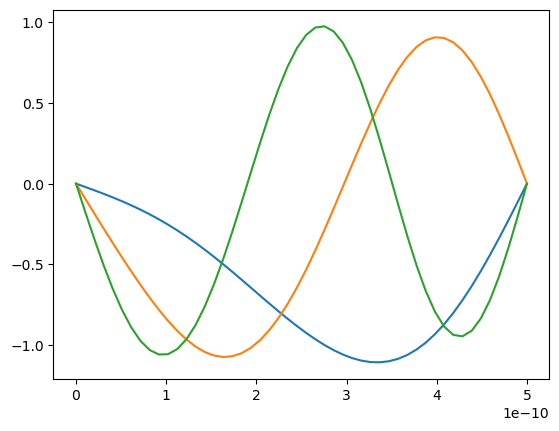

In [21]:
from math import sin, pi
import matplotlib.pyplot as plt

eigen, V = np.linalg.eigh(H)
def phi(x_, psin):
    L = 5e-10
    psi = 0
    for i in range(len(psin)):
        psi += psin[i]*sin(pi*(i+1)*x_/L)
    return psi

x = np.linspace(0, 5e-10, 50)

phi_0 = [phi(xi, V[0]) for xi in x]
phi_1 = [phi(xi, V[1]) for xi in x]
phi_2 = [phi(xi, V[2]) for xi in x]

plt.plot(x, phi_0)
plt.plot(x, phi_1)
plt.plot(x, phi_2)

In [23]:
#normalization of the wave function
print("ground state:",V[0]@V[0])
print("ground state:",V[1]@V[1])
print("ground state:",V[2]@V[2])

ground state: 0.9999999999999992
ground state: 0.999999999999998
ground state: 0.9999999999999991


Exercise 6.10

In [19]:
from math import log
#x=1-exp(-cx)
error = 1e-6
epsilon = 1
x = -1
c = 2

while epsilon > error:
    x_ = -(1/c)*log(1-x)
    epsilon = abs((x-x_)/(1 - c*(1-x)))
    x = x_

print(epsilon)
print(x)
    

9.900583835763254e-07
-9.900603440373645e-07


/tmp/ipykernel_5610/2786069746.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  epsilon = abs((x-x_)/(1 - ci*(1-x)))


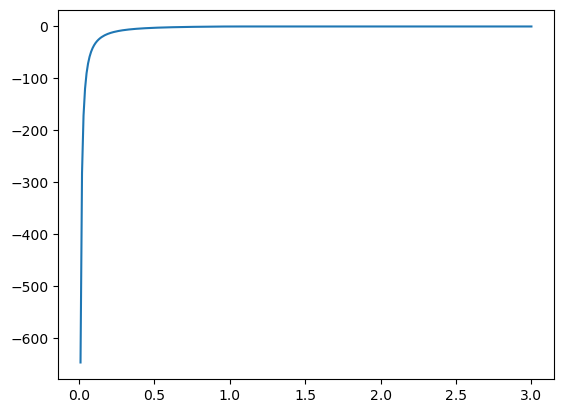

In [28]:
import numpy as np
import matplotlib.pyplot as plt

c = np.arange(0.01,3.01,0.01)
error = 1e-6
x_c = []

for ci in c:
    x = -1
    
    epsilon = 1
    while epsilon > error:
        x_ = -(1/ci)*log(1-x)
        epsilon = abs((x-x_)/(1 - ci*(1-x)))
        x = x_
    x_c.append(x)
    
plt.plot(c,x_c)

Exercise 6.11: Overrelaxation

$$x'=(1+\omega)f(x) - \omega x,$$
$$x'=(1+\omega)(f(x^*) + (x-x^*)f'(x^*)) - \omega x,$$
$$x'=(1+\omega)(x^* + (x-x^*)f'(x^*)) - \omega x,$$
$$x' - x^*= \omega (x^* - x) + (1+\omega)(x-x^*)f'(x^*),$$
$$\epsilon'=\epsilon ((1+\omega)f'(x^*) - \omega).$$


$$x^*= x+\epsilon = x + \frac{\epsilon'}{(1+\omega)f'(x^*) - \omega}=x' + \epsilon',$$
then
$$\epsilon'=\frac{x-x'}{1-\frac{1}{(1+\omega)f'(x^*) - \omega}}.$$

In [33]:
from math import log
#x=1-exp(-cx)
error = 1e-6
epsilon = 1
x = -1
c = 2
number_it = 0
while epsilon > error:
    x_ = -(1/c)*log(1-x)
    epsilon = abs((x-x_)/(1 - c*(1-x)))
    x = x_
    number_it += 1

print("iterations:", number_it)
print(x)
    

iterations: 19
-9.900603440373645e-07


In [50]:
from math import log
#x=1-exp(-cx)
error = 1e-6
epsilon = 1
x = -1
c = 2
omega = 1.0
number_it = 0

while epsilon > error:
    x_ = -(1/c)*log(1-x)*(1+omega) - omega*x
    epsilon = abs((x-x_)/(1-(1/((1+omega)*(1/(c*(1-x))) - omega))))
    x = x_
    number_it += 1

print(number_it)
print(x)
    

5
1.4797755526490966e-12


Exercise 6.12

$$-x+ay+x^2y=0,$$
$$b-ay-x^2y=0.$$

If we sum both eqautions we get
$$-x + b=0,$$
so
$$x=b.$$
Using $x=b$ in the second equation we get
$$b-ay-b^2y=0,$$
or
$$y(a+b^2)=b$$
so
$$y=\frac{b}{a+b^2}.$$

Using the first equation and leaving $x$ in one side of the eqaution we get
$$x=y(a+x^2).$$
Isolating $y$ from the second equation we get
$$y=\frac{b}{a+x^2}.$$

In [53]:
a = 1
b = 2

x = 2.5
y = 1

for i in range(200):
    x_ = y*(a + x**2)
    y_ = b/(a + x**2)
    x = x_
    y = y_
    
print(x)
print(y)

32.4087983982113
0.001506099966289107


$$y=\frac{x}{a+x^2},$$
$$x=\sqrt{\frac{b-ay}{y}}.$$

In [58]:
from math import sqrt
a = 1
b = 2

x = 2.5
y = 1

for i in range(30):
    x_ = sqrt((b-a*y)/y)
    y_ = x/(a+x**2)
    x = x_
    y = y_
    
print(x)
print(y)

2.000000211490196
0.40000008952469757


Exercise 6.13

$$\frac{d}{d\lambda} I=0=\left(e^{hc/\lambda k_BT} - 1 \right)(-5)2\pi h c^2 \lambda^{-6}+2\pi hc^2\lambda^{-5}\left(e^{hc/\lambda k_BT} \right)\frac{hc}{k_BT \lambda^2},$$
$$0=-5+5e^{-hc/\lambda k_B T} + \frac{hc}{k_BT\lambda.}$$

Let $x=hc/\lambda k_BT$, then
$$5e^{-x} +x-5=0,$$
and 
$$\lambda = \frac{hc/k_Bx}{T}=\frac{b}{T}.$$

In [76]:
from math import exp

def f(x):
    return 5*exp(-x) + x - 5

x1 = 0.1
x2 = 10
epsilon = 1e-10
error = 20

while error > epsilon:
    if f(0.5*(x1+x2))/f(x1) > 0:
        x1 = 0.5*(x1+x2)
    else:
        x2 = 0.5*(x1+x2)
    error = abs(x2-x1)

print(error)
print(x1)
print(x2)
print(0.5*x2 + 0.5*x1)

7.203215801609986e-11
4.965114231678308
4.9651142317503405
4.965114231714324


In [77]:
f(0.5*x2 + 0.5*x1)

-2.8907543025979976e-11

In [79]:
x = 0.5*x2 + 0.5*x1

h = 6.62607015e-34
c = 3e8
k_B = 1.380649e-23
wavel = 502e-9
b = h*c/(k_B * x)

T = b/wavel
T

5776.450280843145

Exercise 6.14

/tmp/ipykernel_5610/3651664724.py:11: RuntimeWarning: divide by zero encountered in divide
  y_2 = np.sqrt((V-E)/E)
/tmp/ipykernel_5610/3651664724.py:12: RuntimeWarning: divide by zero encountered in divide
  y_3 = -np.sqrt(E/(V-E))


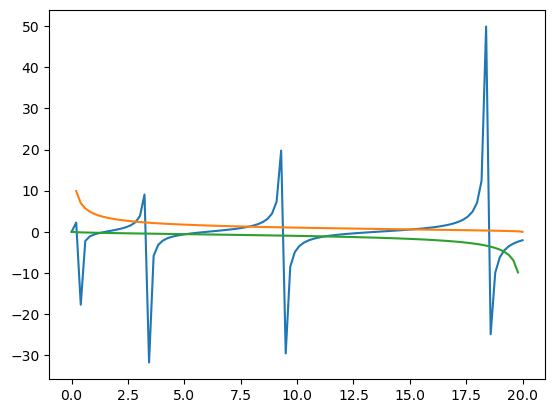

In [82]:
import numpy as np
import matplotlib.pyplot as plt

E = np.linspace(0,20,100)
w = 1e-9
V = 20
m = 0.51099895069e6 /9e16
hbar = 6.582119569e-16

y_1 = np.tan(np.sqrt((w**2)*m*E/(2*(hbar**2))))
y_2 = np.sqrt((V-E)/E)
y_3 = -np.sqrt(E/(V-E))

plt.plot(E, y_1)
plt.plot(E, y_2)
plt.plot(E, y_3)